<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;"> Storytelling And Prediction of Heart Strokes</h1>
<br>
<br>
<br>
<div class = 'image'> <img style="float:center; border:5px solid grey; width:75%" align=center src = https://www.eehealth.org/-/media/images/modules/blog/posts/heartline.jpg?h=500&w=750&hash=8147AFA9A68A838E7227B6524E566A99> 
</div>
<br>
<br>

[Source: Heart attack and Heart stroke](https://www.eehealth.org/blog/2016/05/heart-attack-stroke-connection/)
<br>
<br>


# Please upvote my work if you find it helpful. Please don't ignore. Happy reading...

# my past notebook honest feedback is welcome.
* [netflix is awsome why? see here](https://www.kaggle.com/bhuvanchennoju/netflix-is-awsome-why-see-here)

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Preprocessing- loading, Missingvalues, and feature extraction](#1.2)
* [2. Storytelling With Data - Explinatory Data Analysis](#2)
    * [2.0 Distribution of targets](#2.0)
    * [2.1 Univariate analysis of continuous variables](#2.1)
    * [2.2 Overview of univariete categorical features](#2.2)
    * [2.3 Univariate analysis of categorical variables](#2.3)
    * [2.4 Relationship between two continuous variables](#2.4)
    * [2.5 Visualization of the correlations between features](#2.5)
* [3. Visualization of Data Balancing with Datasampling techniques](#3)
* [4. Modeling and results](#4)
* [5. References](#5)


<a id = '1'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 1. Introduction </h2>



<br>


Do you know, 80% Heart strokes are preventable?, yes they are. In this notebook, we attempted to visulize some key indicators that lead to heart strokes. Here data is sampled from a wide range of age groups, gender, habits and health related issues. Most of the visualizations are self expilantory and try to stick to simple visualization but effiective method to convey most of the information.

<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #fe346e; border-radius: 100px 100px; text-align:left">Problem Statement</h3>

Visululize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #fe346e; border-radius: 100px 100px; text-align:left"> Questions and Assumptions</h3>

1. Does age has impact on strokes? and How is this parameter distributed?
2. Does body mass index and glucose levels in a person, propel a heart stroke?
3. Assumption: Smoking can induce Stroke, is it true?
4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?
5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?
6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true?
7. Relationship between continous and categorical data
8. Feature importance and Feature Selection for accurate predictions    

<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : #fe346e; border-radius: 100px 100px; text-align:left"> Additional Reading Related To Problem Statement</h3>

All the assumptions are made from following articles and trying to address these points with data in this notebook

* [ Is It a Stroke or a Heart Attack?](https://www.healthline.com/health/stroke-vs-heart-attack)
* [ Heart Disease and Stroke](https://www.webmd.com/heart-disease/stroke)
* [ What is stroke?](https://www.heartandstroke.ca/stroke/what-is-stroke)
* [ Stroke after a heart attack: What’s the risk?](https://www.health.harvard.edu/heart-health/stroke-after-a-heart-attack-whats-the-risk)




Questions addressed here and can we able to understand the relationship between strokes and general 

<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.1 Libraries and Utilities</h2>

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)




#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


# dimensionality reduction
from sklearn.decomposition import PCA
from umap import UMAP
import pylab as pl

# imbalance dataset handling

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)




# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


     |████████████████████████████████| 526 kB 864 kB/s 


<a id = '1.2'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.2 Data Preprocessing </h2>

In this section, loading of data, visulaizing missing values and feature extraction will be carried out. 
In the current dataset, there are 11 features and one binary target. A brief information about the features are given below
1. **id**: Identification number of the individual.
2. **gender**: Gender of the individual.
3. **hypertension**: Health related parameter, does person have hypertension.
4. **heart_disease**: Health related parameter, does person have heart disease.
5. **ever_married**: Personal information, is person married on not?
6. **work_type**: Nature of work place.
7. **Residence_type**: Residence type of the individual.
8. **avg_glucose_level**: average glucose level in blood for the individual.
9. **bmi**: body mass index of the individual.
10. **smoking_status**: Habitual information. Current smoking status of individual.
11. **stroke**: Our taget, is person suffered heart attack?

<h4 style = "background-color: white; color : #fe346e; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Loading data </h4>

In [2]:
# loading data
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
df.head(3).T

0              1             2
id                            9046          51676         31112
gender                        Male         Female          Male
age                           67.0           61.0          80.0
hypertension                     0              0             0
heart_disease                    1              0             1
ever_married                   Yes            Yes           Yes
work_type                  Private  Self-employed       Private
Residence_type               Urban          Rural         Rural
avg_glucose_level           228.69         202.21        105.92
bmi                           36.6            NaN          32.5
smoking_status     formerly smoked   never smoked  never smoked
stroke                           1              1             1

<h4 style = "background-color: white; color : #fe346e; font-size: 30px; font-family:garamond; font-weight:normal; border-radius: 75px 150px; text-align: left"> Non-Null ValueCounts and Feature Datatypes</h4> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h4 style = "background-color: white; color : #fe346e; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Statistics of Categorical and Numerical Data</h4> 

In [4]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)


id      age  hypertension  heart_disease  avg_glucose_level  \
count   5110.00  5110.00        5110.0        5110.00            5110.00   
mean   36517.83    43.23           0.1           0.05             106.15   
std    21161.72    22.61           0.3           0.23              45.28   
min       67.00     0.08           0.0           0.00              55.12   
25%    17741.25    25.00           0.0           0.00              77.24   
50%    36932.00    45.00           0.0           0.00              91.88   
75%    54682.00    61.00           0.0           0.00             114.09   
max    72940.00    82.00           1.0           1.00             271.74   

           bmi   stroke  
count  4909.00  5110.00  
mean     28.89     0.05  
std       7.85     0.22  
min      10.30     0.00  
25%      23.50     0.00  
50%      28.10     0.00  
75%      33.10     0.00  
max      97.60     1.00

In [5]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

<h4 style = "background-color: white; color : #fe346e; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Initial Insights About Dataset</h4> 

1. Data from bmi feature is missing.
2. Both Categorical and numerical features are present.
    - **Categorical Features**: gender, ever_married, work_type, Residence_type, smoking_status
    - **Binary Numerical Features**: hypertension,heart_disease, stroke
    - **Continous Numerical Features**: age, avg_glucose_level, bmi 
3. Most of the data is categorical which need a special attention to visulaize those
4. Feature extraction can  be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

<h4 style = "background-color: white; color : #fe346e; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Visualization of Nullity of the Dataset</h4>

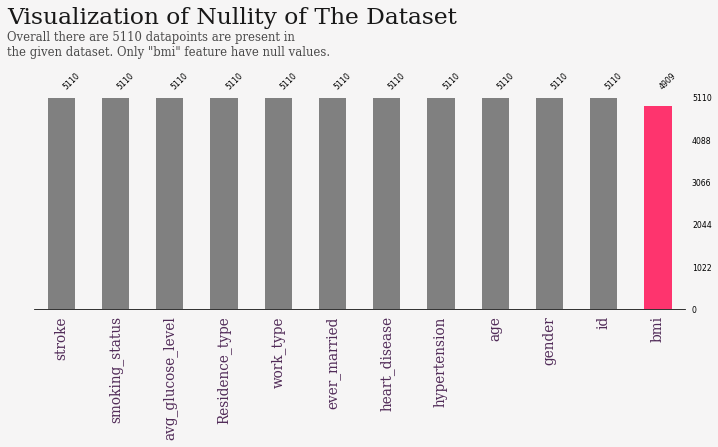

In [6]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'Serif', 'Size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 5110 datapoints are present in \nthe given dataset. Only "bmi" feature have null values.',{'font': 'Serif', 'Size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'Size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

In [7]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Only bmi feature have some missing data,which was be filled with the median of the same column. For feature extraction, binning was applied for all the continous values, binning values are taken from follow articles.


* [body mass index binning](https://www.medicalnewstoday.com/articles/323446#body-mass-index)
* [Age binning](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
* [average glucose binning](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)

In [8]:
## binning of numerical variables

df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])


<a id = '2'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2. Stroytelling With Data </h2>


Data storytelling is a popular method to convey most of the information in terms of simple plots rather with complex analysis. This techique's main objective to perform explinatory data analysis rather than exploratory data analysis. All the plots made are as simple as possible with no interactivity and complecations. For whole visualization a simple color palette shown in palplot was used. Few key points are highlighted in the plot it self.

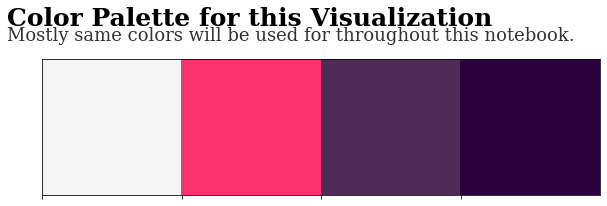

In [9]:
# color palette for visualizations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()



<a id = '2.0'></a>
<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center">  2.0 Distribution of Targets </h2>


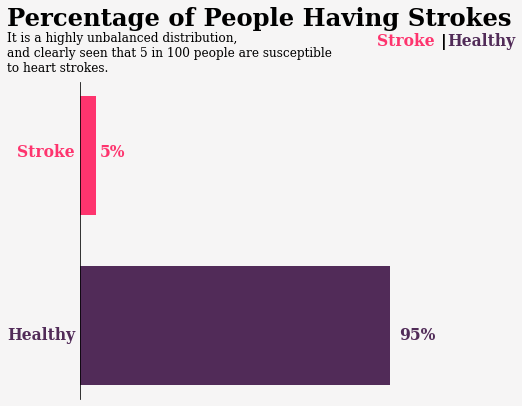

In [10]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150,-0.08, 'Healthy',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#512b58'})
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#512b58'})
ax.barh([0], x.stroke[0], height = 0.7, color = '#512b58')
plt.text(-1000,1, 'Stroke', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#fe346e'})
plt.text(300,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#fe346e'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'Percentage of People Having Strokes' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
plt.text(4650,1.65, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
plt.text(5650,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(5750,1.65, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
plt.text(-1150,1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.', 
        {'font':'Serif', 'size':'12.5','color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


From distribution it is clear that every 5 people out of 100 people are having strokes from our sampling data. Moreover,this is a highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

<a id = '2.1'></a>
<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2.1 Univariate analysis of continuous variables</h2>


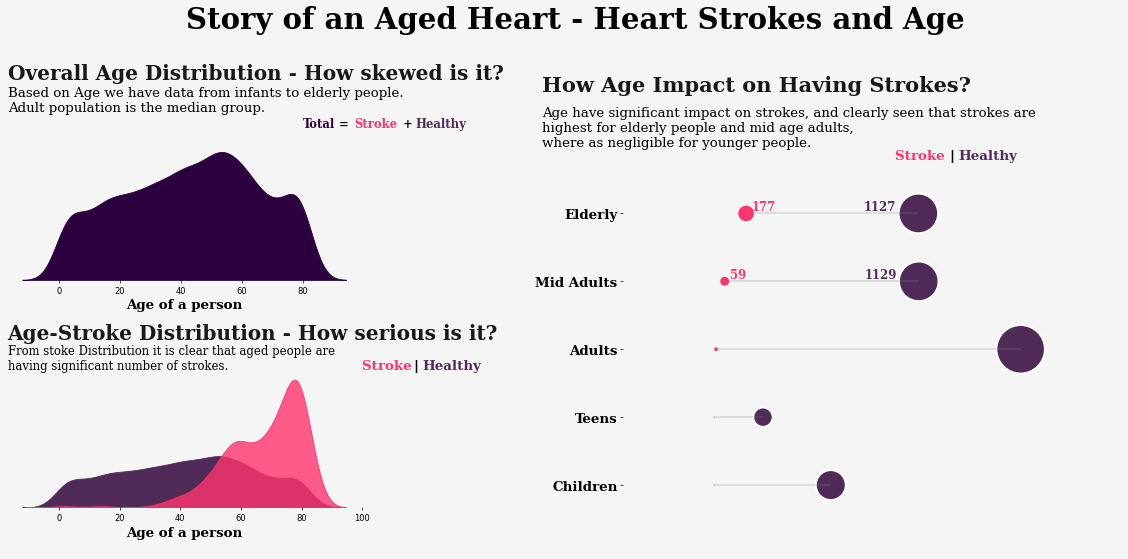

In [11]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_age = df[df['stroke'] == 1].age_cat.value_counts()
healthy_age = df[df['stroke'] == 0].age_cat.value_counts()

ax1.hlines(y = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], xmin = [644,270,1691,1129,1127], 
          xmax = [1,1,11,59,177], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()


Age is an important feature. Age feature distribution is not a normal distriubtion, which needs to be tranformed later. From catergorical features it can be seen that old age people are mostly having strokes, compared to younger ones.

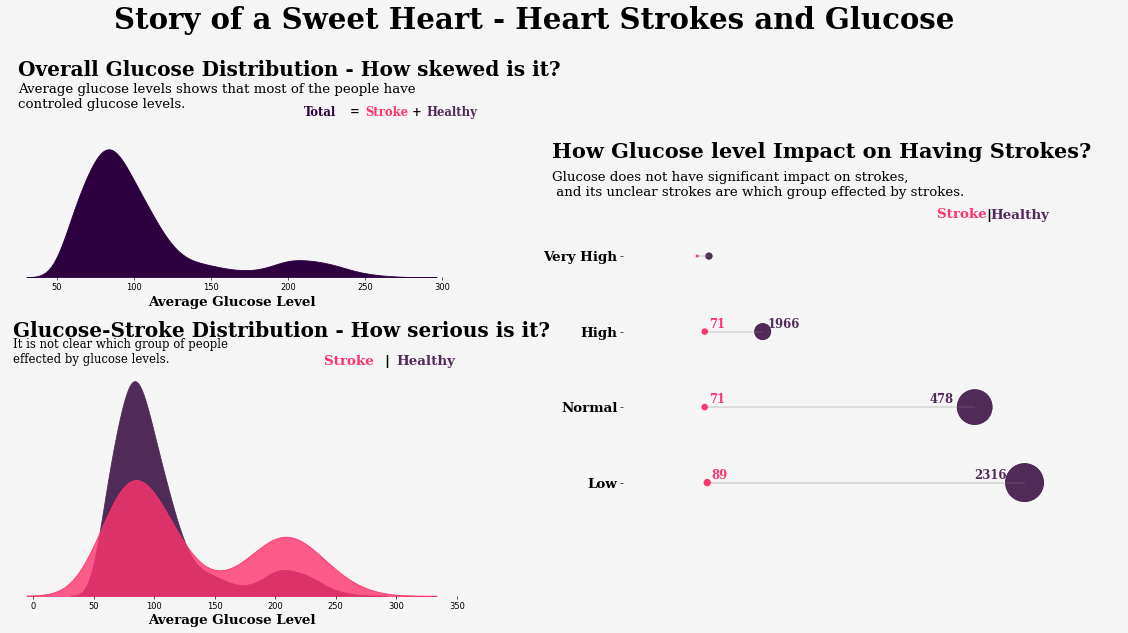

In [12]:
# sugar distribution plots


fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot
ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df[df['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df[df['stroke'] == 0].glucose_cat.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-1000,4.3, 'How Glucose level Impact on Having Strokes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
ax1.text(1700,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(2050,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2075,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-1000,3.8, 'Glucose does not have significant impact on strokes,\n and its unclear strokes are which group effected by strokes.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_glu.values[0] + 30,0.05, stroke_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[0] + -355,0.05, healthy_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[1] - 1450,2.05, healthy_glu.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(25,0.021, 'Average glucose levels shows that most of the people have \ncontroled glucose levels.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-17,0.0176,'It is not clear which group of people \neffected by glucose levels.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})


fig.text(0.2,1.07,'Story of a Sweet Heart - Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()


Glucose level distribution is skewed towards left and most ofhte strkes can be seen people with regular glucose levels.

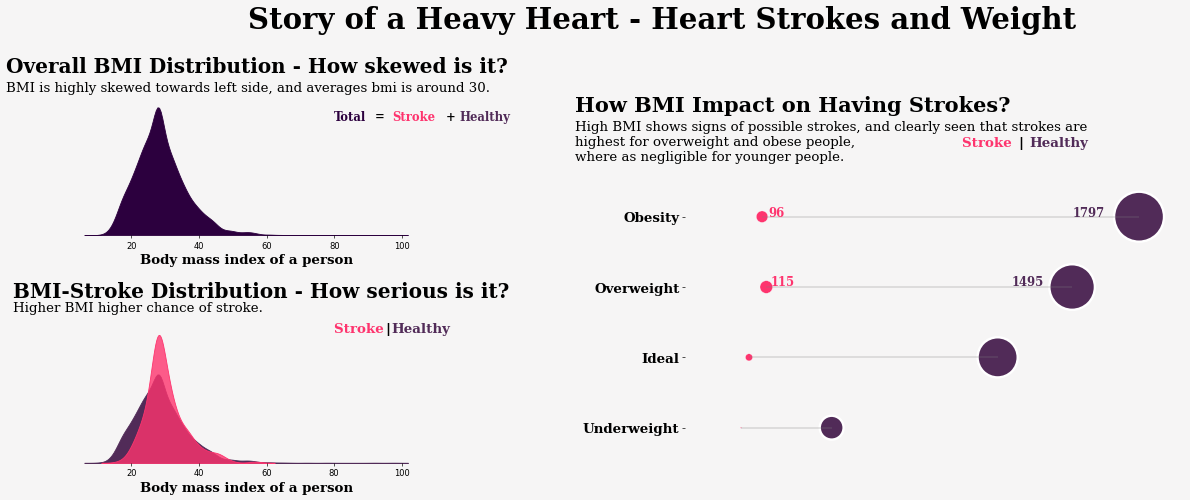

In [13]:
fig = plt.figure(figsize = (24,10),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot of stoke and healthy people

stroke_bmi = df[df['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df[df['stroke'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = [96,115,37,1], 
          xmax = [1797,1495,1159,410], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_bmi.index, x = stroke_bmi.values, s = stroke_bmi.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bmi.index, x = healthy_bmi.values, s = healthy_bmi.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-750,-1.5, 'How BMI Impact on Having Strokes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
ax1.text(1000,-1., 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1250,-1, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1300,-1, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-750,-0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})



ax1.text(stroke_bmi.values[0] + 20 , 0.98, stroke_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[1] - 275 ,0.98, healthy_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_bmi.values[1] + 30,0, stroke_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[0] - 300,0, healthy_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-17,0.075, 'BMI is highly skewed towards left side, and averages bmi is around 30.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-15,0.11,'Higher BMI higher chance of stroke.', {'font':'Serif', 'color': 'black', 'size':16})
ax3.text(80,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(97,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,0.925,'Story of a Heavy Heart - Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()



BMI is highly skewed and high bmi , high possibility of having strokes.

<a id = '2.2'></a>

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2.2 Overview of univariate categorical variables</h2>


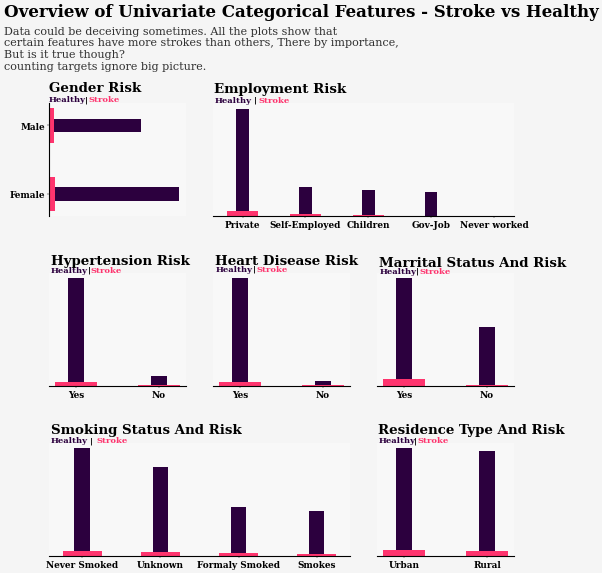

In [14]:
fig = plt.figure(figsize = (15,15),dpi = 40)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0,1.5, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)


ax2.text(-0.45,3200, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)

# Ax3: hypertension - stroke distributions

healthy_gen = df[df['stroke'] == 0].hypertension.value_counts()
stroke_gen = df[df['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticklabels(['Yes','No'], **font_dict)

ax3.text(-0.3,5000, 'Hypertension Risk',**title_args)
ax3.text(-0.3,4700, 'Healthy',**health_dict)
ax3.text(0.14,4700, '|',**dash_dict)
ax3.text(0.18,4700, 'Stroke',**stroke_dict)


# Ax4: Heart Disease - stroke distributions

healthy_gen = df[df['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df[df['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax4.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax4.set_xticklabels(['Yes', 'No'],**font_dict)

ax4.text(-0.3,5250, 'Heart Disease Risk',**title_args)
ax4.text(-0.3,4950, 'Healthy',**health_dict)
ax4.text(0.15,4950, '|',**dash_dict)
ax4.text(0.20,4950, 'Stroke',**stroke_dict)


# Ax5: Married - stroke distributions
healthy_gen = df[df['stroke'] == 0].ever_married.value_counts()
stroke_gen = df[df['stroke'] == 1].ever_married.value_counts()

ax5.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax5.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col )
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3,3500, 'Marrital Status And Risk',**title_args)
ax5.text(-0.3,3300, 'Healthy',**health_dict)
ax5.text(0.14,3300, '|',**dash_dict)
ax5.text(0.18,3300, 'Stroke',**stroke_dict)




# Ax6: Smoking status - stroke distributions

healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()

ax6.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax6.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax6.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax6.text(-0.4,2050, 'Smoking Status And Risk',**title_args)
ax6.text(-0.4,1900, 'Healthy',**health_dict)
ax6.text(0.095,1900, '|',**dash_dict)
ax6.text(0.18,1900, 'Stroke',**stroke_dict)




# Ax7: Residence type - stroke distributions

healthy_gen = df[df['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df[df['stroke'] == 1].Residence_type.value_counts()

ax7.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax7.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.31,2800, 'Residence Type And Risk',**title_args)
ax7.text(-0.31,2600, 'Healthy',**health_dict)
ax7.text(0.12,2600,'|',**dash_dict)
ax7.text(0.165,2600, 'Stroke',**stroke_dict)

fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
fig.text(0.05,0.9375,'Data could be deceiving sometimes. All the plots show that\ncertain features have more strokes than others, There by importance, \nBut is it true though? \ncounting targets ignore big picture.',{'font':'Serif', 'color':'black','size':20, 'weight':'normal'}, alpha = 0.8)

fig.show()

Overview of the categorical features shows the value counts of the strokes and no strokes for each categorical feature. This overview could give some insight where strokes are high in number.

<a id = '2.3'></a>

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2.3 Univariate analysis of categorical variables</h2>


<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Gender Distribution </h2>


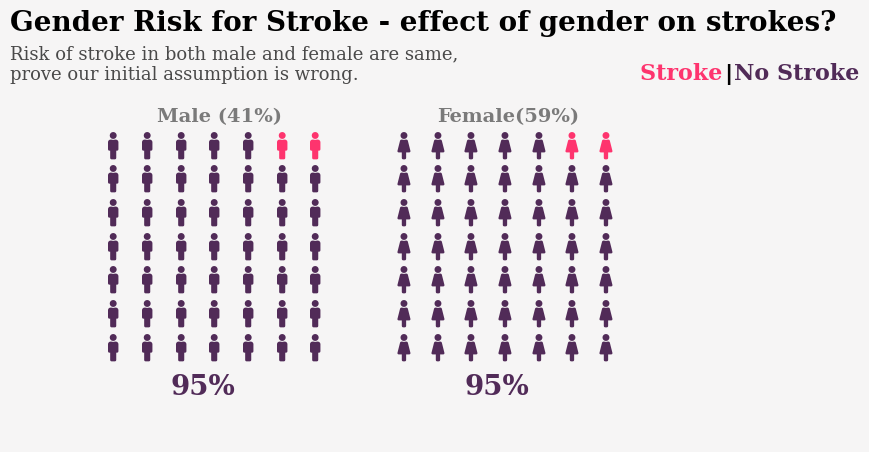

In [15]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
#fig.text ('asdfasdfasd0', {'font':'Serif', 'size':35, 'color':'black'} )


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> HyperTension Distribution </h2>


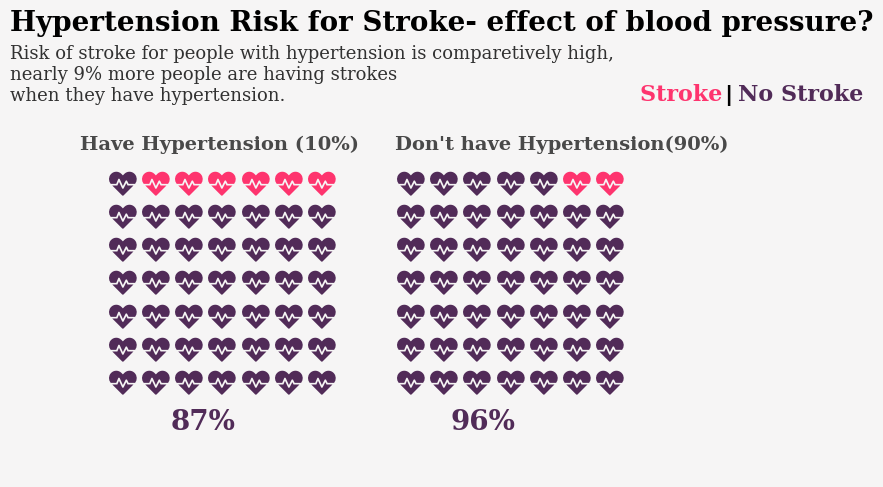

In [16]:
stroke_hyper = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = df[df['stroke'] == 0]['hypertension'].value_counts()

no = df['hypertension'].value_counts().values[0]
yes =  df['hypertension'].value_counts().values[1]

stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heartbeat',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.85, 'Hypertension Risk for Stroke- effect of blood pressure?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.75, 'Risk of stroke for people with hypertension is comparetively high,\nnearly 9% more people are having strokes \nwhen they have hypertension. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'},alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.63, 0.28, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.1, 0.68, 'Have Hypertension ({}%)'.format(yes_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.7,)
fig.text(0.55, 0.68, "Don't have Hypertension({}%)".format(no_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.7)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.90,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> HeartDisease Distribution </h2>


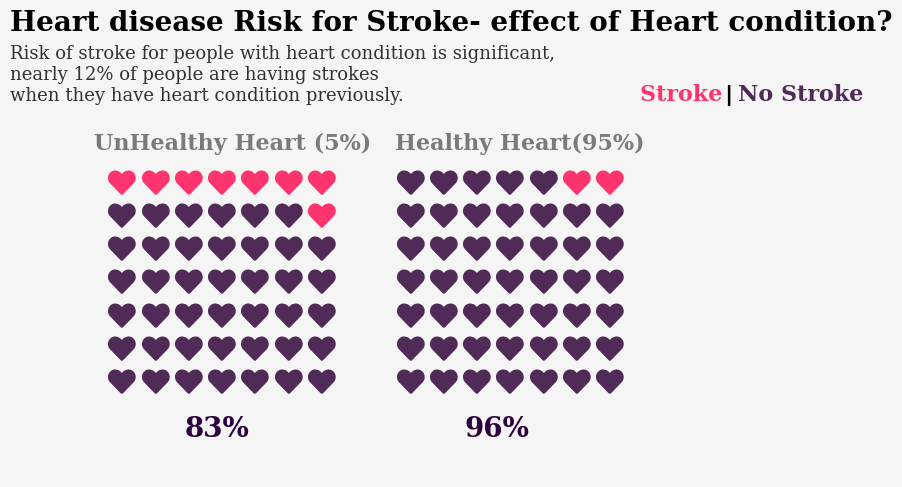

In [17]:
stroke_hyper = df[df['stroke'] == 1]['heart_disease'].value_counts()
healthy_hyper = df[df['stroke'] == 0]['heart_disease'].value_counts()

no = df['heart_disease'].value_counts().values[0]
yes =  df['heart_disease'].value_counts().values[1]

stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heart',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.85, 'Heart disease Risk for Stroke- effect of Heart condition?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.75, 'Risk of stroke for people with heart condition is significant,\nnearly 12% of people are having strokes \nwhen they have heart condition previously. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.25, 0.27, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.65, 0.27, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.12, 0.68, 'UnHealthy Heart ({}%)'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.55, 0.68, "Healthy Heart({}%)".format(no_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Marriage Distribution </h2>


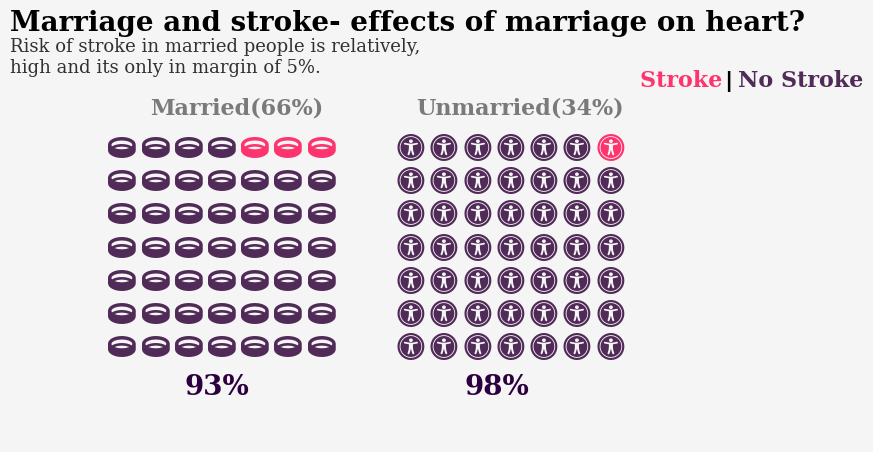

In [18]:
stroke_mary = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_mary = df[df['stroke'] == 0]['ever_married'].value_counts()

yes = df['ever_married'].value_counts().values[0]
no =  df['ever_married'].value_counts().values[1]

stroke_no = int(round (stroke_mary.values[1] / no * 100, 0))
stroke_yes = int(round( stroke_mary.values[0] / yes *100, 0))
healthy_no = int(round(healthy_mary.values[1] / no * 100, 0))
healthy_yes = int(round(healthy_mary.values[0] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ring',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'universal-access',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Marriage and stroke- effects of marriage on heart?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.74, 'Risk of stroke in married people is relatively,\nhigh and its only in margin of 5%.', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.25, 0.28, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' , 'color':'#2c003e'}, alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.20, 0.68, 'Married({}%)'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.58, 0.68, "Unmarried({}%)".format(no_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.72, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.72, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.72, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Residence Distribution </h2>


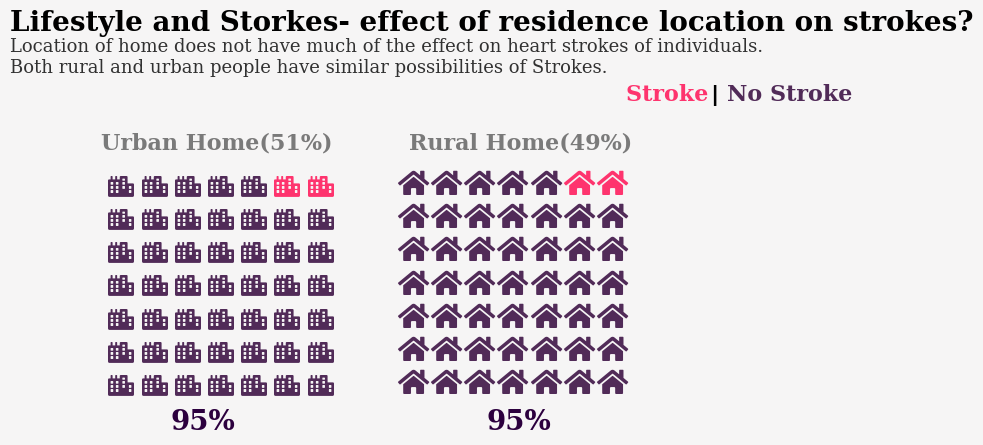

In [19]:
stroke_home = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_home= df[df['stroke'] == 0]['Residence_type'].value_counts()

urban = df['Residence_type'].value_counts().values[0]
rural =  df['Residence_type'].value_counts().values[1]

stroke_urban = int(round (stroke_home.values[0] / urban * 100, 0))
stroke_rural= int(round( stroke_home.values[1] / rural *100, 0))
healthy_urban = int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_home.values[1] / rural *100, 0))

urban_per = int(round(urban/(urban+rural) * 100, 0))
rural_per = int(round(rural/(urban+rural)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_urban,healthy_urban],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'city',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_rural,healthy_rural],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'home',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.85, 'Lifestyle and Storkes- effect of residence location on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.79, 'Location of home does not have much of the effect on heart strokes of individuals.\nBoth rural and urban people have similar possibilities of Strokes.', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha =0.8)

fig.text(0.23, 0.28, '{}%'.format(healthy_urban), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.68, 0.28, '{}%'.format(healthy_rural), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.13, 0.68, 'Urban Home({}%)'.format(urban_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.57, 0.68, "Rural Home({}%)".format(rural_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.88,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.025,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Smoking Distribution </h2>


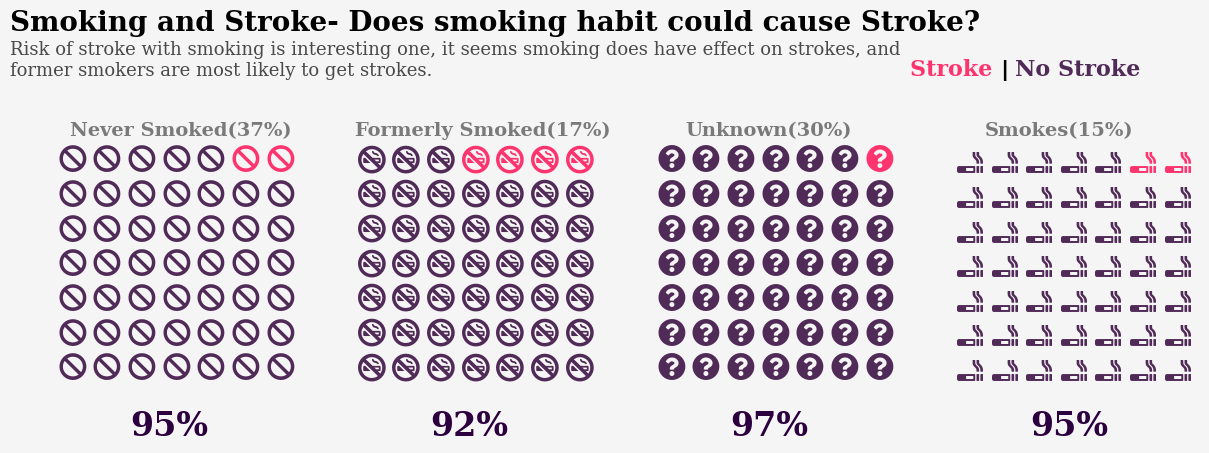

In [20]:
smoke = df['smoking_status'].value_counts()
stroke_smoke = df[df['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = df[df['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))


never_per = int(round(never/(never+unknown+former+smokes) * 100, 0))
unknown_per = int(round(unknown/(never+unknown+former+smokes)* 100, 0))
former_per = int(round(former/(never+unknown+former+smokes) * 100, 0))
smokes_per = int(round(smokes/(never+unknown+former+smokes)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'141':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_never,healthy_never],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ban',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '142' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_former,healthy_former],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'smoking-ban',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '143':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_unknown,healthy_unknown],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'question-circle',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '144' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_smokes,healthy_smokes],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'smoking',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
)


fig.text(0.1, 0.65, 'Smoking and Stroke- Does smoking habit could cause Stroke?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0.1, 0.62, 'Risk of stroke with smoking is interesting one, it seems smoking does have effect on strokes, and \nformer smokers are most likely to get strokes. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.18, 0.38, '{}%'.format(healthy_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.38, 0.38, '{}%'.format(healthy_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.58, 0.38, '{}%'.format(healthy_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.78, 0.38, '{}%'.format(healthy_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.14, 0.58, 'Never Smoked({}%)'.format(never_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.33, 0.58, "Formerly Smoked({}%)".format(former_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.55, 0.58, 'Unknown({}%)'.format(unknown_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.75, 0.58, "Smokes({}%)".format(smokes_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.7,0.62, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(0.76,0.62, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.77,0.62, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Work Distribution </h2>


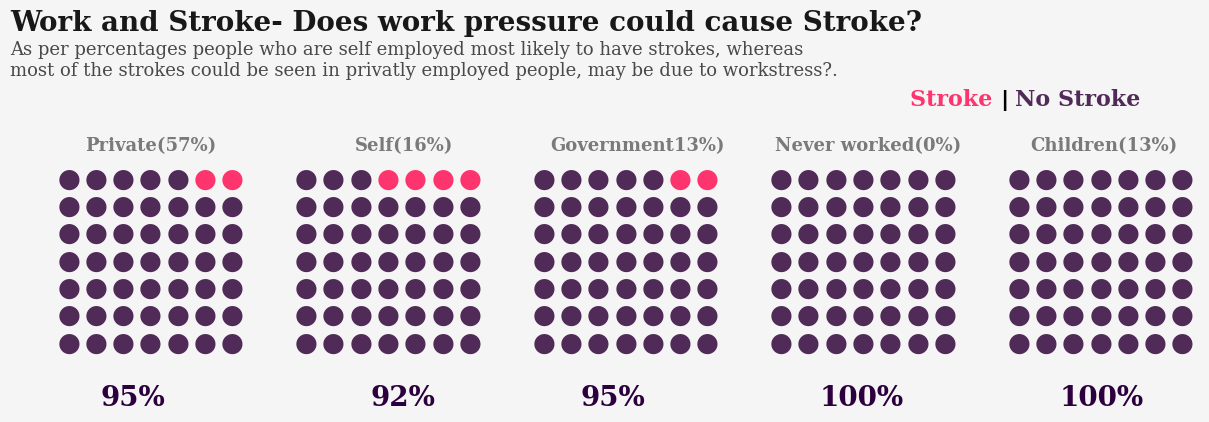

In [21]:
work = df['work_type'].value_counts()
stroke_work = df[df['stroke'] == 1]['work_type'].value_counts()
healthy_work = df[df['stroke'] == 0]['work_type'].value_counts()

private = work.values[0]
self =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self = int(round( stroke_work.values[1]  / self *100, 0))
stroke_child = int(round (stroke_work.values[3]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[2]  / gov *100, 0))
stroke_never = int(round( 0, 0))

healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self = int(round(healthy_work.values[1] / self *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

private_per = int(round(private/(private+self+child+gov+never) * 100, 0))
self_per = int(round(self/(private+self+child+gov+never)* 100, 0))
child_per = int(round(child/(private+self+child+gov+never) * 100, 0))
gov_per = int(round(gov/(private+self+child+gov+never)* 100, 0))
never_per = int(round(never/(private+self+child+gov+never)* 100, 0))


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'151':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_private,healthy_private],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '152' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_self,healthy_self],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '153':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_gov,healthy_gov],
                            'colors' : ['#fe346e','#512b58'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '154' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_never,healthy_never],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '155' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_child,healthy_child],         
                              'colors' : ['#fe346e','#512b58'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
)


fig.text(0.1, 0.65, 'Work and Stroke- Does work pressure could cause Stroke?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'},alpha = 0.9)
fig.text(0.1, 0.62, 'As per percentages people who are self employed most likely to have strokes, whereas \nmost of the strokes could be seen in privatly employed people, may be due to workstress?.', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.16, 0.40, '{}%'.format(healthy_private), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.34, 0.40, '{}%'.format(healthy_self), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.48, 0.40, '{}%'.format(healthy_gov), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#2c003e'},alpha = 1,)
fig.text(0.64, 0.40, '{}%'.format(healthy_never), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)
fig.text(0.8, 0.40, '{}%'.format(healthy_child), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#2c003e'}, alpha = 1)


fig.text(0.15, 0.57, 'Private({}%)'.format(private_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.33, 0.57, "Self({}%)".format(self_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.46, 0.57, 'Government{}%)'.format(gov_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.57, "Never worked({}%)".format(never_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)
fig.text(0.78, 0.57, "Children({}%)".format(child_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5)         
#fig.text(0., 0.8, 'Assumption was proven wong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.7,0.6, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(0.76,0.6, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.77,0.6, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

<a id = '2.4'></a>

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2.4 Relationship between two continuous variables</h2>


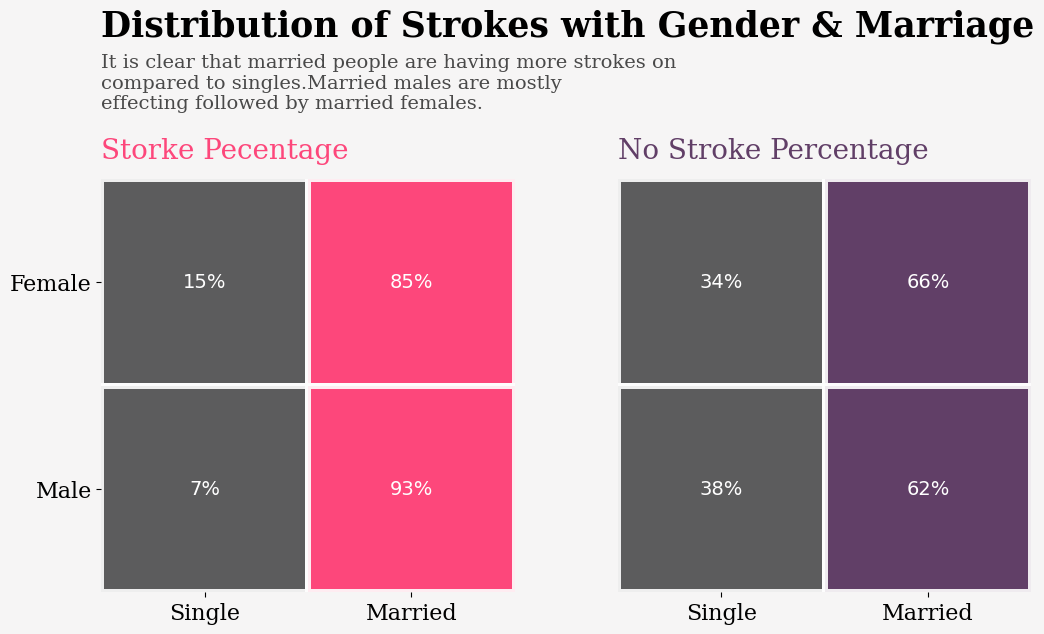

In [22]:

import matplotlib

fig = plt.figure(figsize=(12,6),dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.34, 'It is clear that married people are having more strokes on \ncompared to singles.Married males are mostly \neffecting followed by married females.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Single', 'Married'], {'font':'serif', 'color':'black', 'size':16})
ax1.axes.set_xticklabels(['Single', 'Married'], {'font':'serif', 'color':'black', 'size':16})

ax0.axes.set_yticklabels(['Female', 'Male'], {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

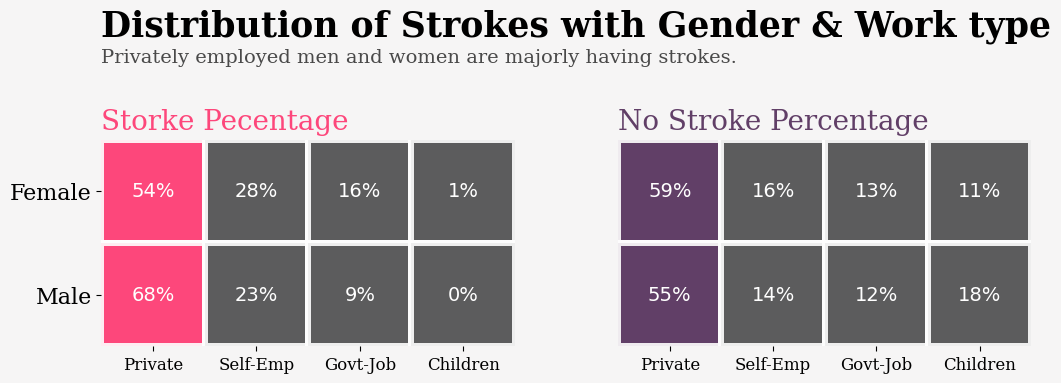

In [23]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
work_order = ['Private', 'Self-employed','Govt_job', 'children']


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['work_type']],normalize='index').loc[gender_order,work_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['work_type']], normalize='index').loc[gender_order,work_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Distribution of Strokes with Gender & Work type', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.75, 'Privately employed men and women are majorly having strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Private', 'Self-Emp','Govt-Job', 'Children'], {'font':'serif', 'color':'black', 'size':12})
ax1.axes.set_xticklabels(['Private', 'Self-Emp','Govt-Job', 'Children'], {'font':'serif', 'color':'black', 'size':12})

ax0.axes.set_yticklabels(gender_order, {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

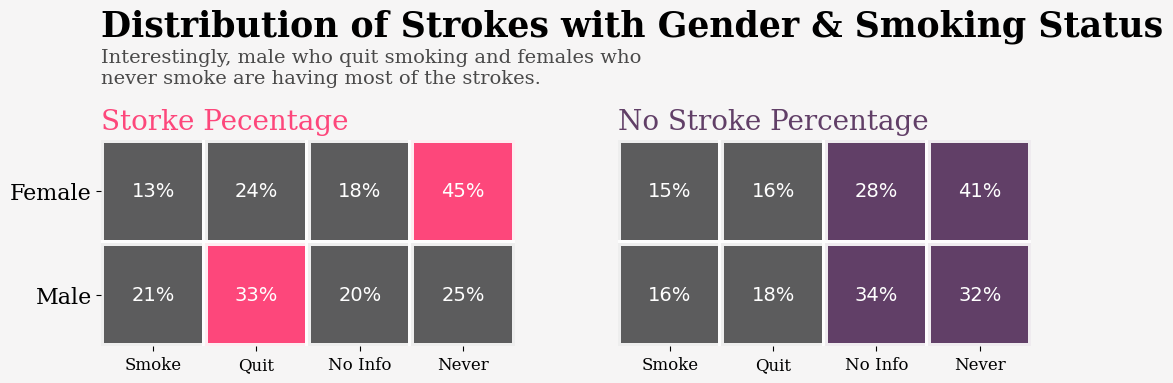

In [24]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['smoking_status']],normalize='index').loc[gender_order,smoking_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['smoking_status']], normalize='index').loc[gender_order,smoking_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Distribution of Strokes with Gender & Smoking Status', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.55, 'Interestingly, male who quit smoking and females who \nnever smoke are having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Smoke', 'Quit','No Info', 'Never'], {'font':'serif', 'color':'black', 'size':12})
ax1.axes.set_xticklabels(['Smoke', 'Quit','No Info', 'Never'], {'font':'serif', 'color':'black', 'size':12})

ax0.axes.set_yticklabels(gender_order, {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

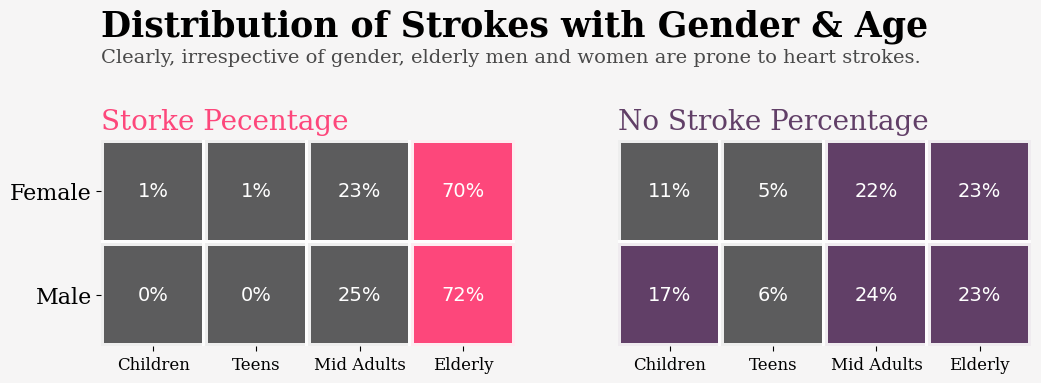

In [25]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
age_order = ['Children', 'Teens', 'Mid Adults', 'Elderly']


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['age_cat']],normalize='index').loc[gender_order,age_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['age_cat']], normalize='index').loc[gender_order,age_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Distribution of Strokes with Gender & Age', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(age_order, {'font':'serif', 'color':'black', 'size':12})
ax1.axes.set_xticklabels(age_order, {'font':'serif', 'color':'black', 'size':12})

ax0.axes.set_yticklabels(gender_order, {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

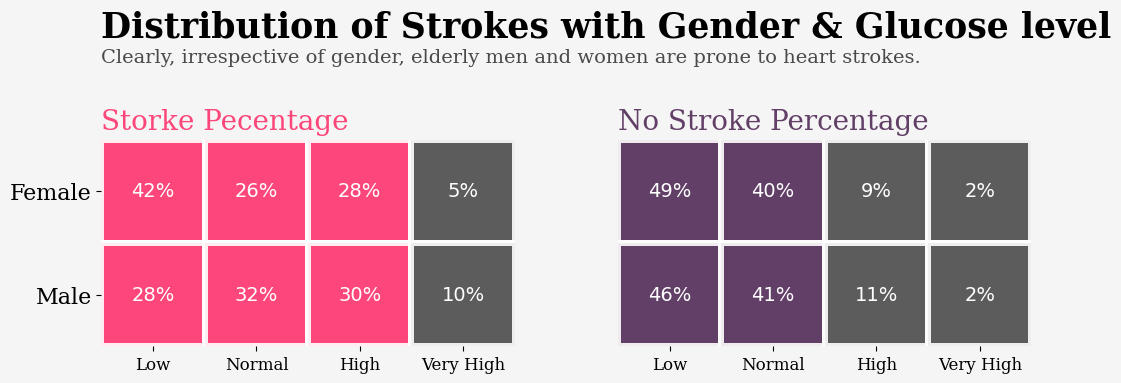

In [26]:
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]

gender_order = ['Female','Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['glucose_cat']],normalize='index').loc[gender_order,glucose_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['glucose_cat']], normalize='index').loc[gender_order,glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -1., 'Distribution of Strokes with Gender & Glucose level', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(glucose_order, {'font':'serif', 'color':'black', 'size':12})
ax1.axes.set_xticklabels(glucose_order, {'font':'serif', 'color':'black', 'size':12})

ax0.axes.set_yticklabels(gender_order, {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

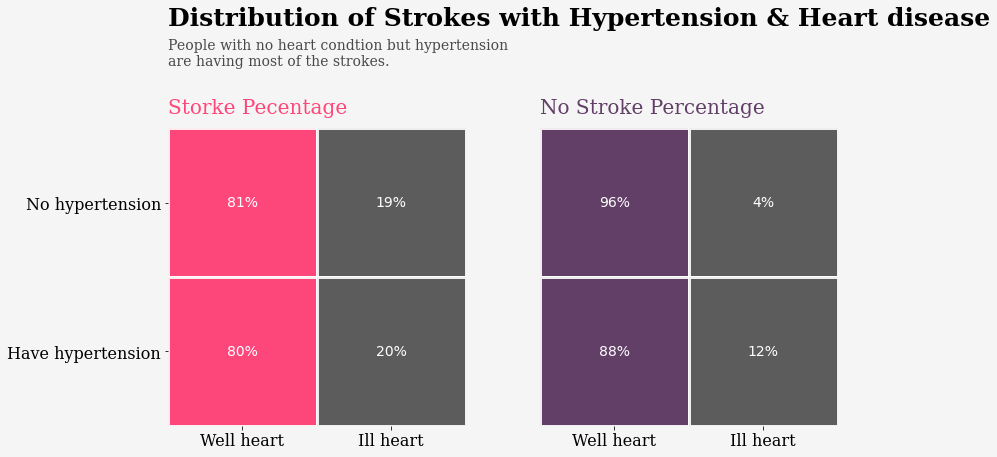

In [27]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['stroke']==0]
stroke = df[df['stroke']==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['hypertension'],[stroke['heart_disease']],normalize='index')
no_stroke = pd.crosstab(healthy['hypertension'],[healthy['heart_disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.42, 'People with no heart condtion but hypertension \nare having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})
ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})

ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], {'font':'serif', 'color':'black', 'size':16}, rotation= 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

<a id = '#2.5'></a>
<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2.5 Visualization of correlations between various features</h2>


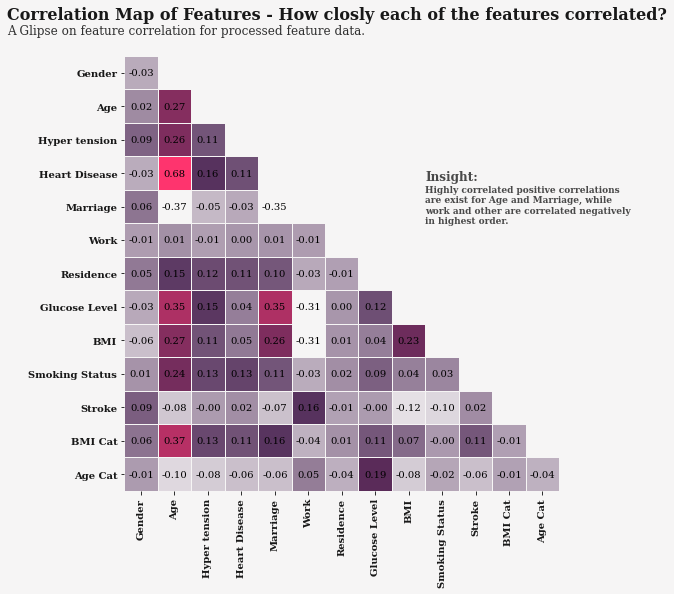

In [28]:

df_copy = df.copy()
# feature log transformations 

df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x+10)*3)
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x+10)*2)



# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

## label encoding of ordinal categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])
    
cols = df_copy.columns
## normalizing with standard scaler of numerical features
df_copy[cols] = ss.fit_transform(df_copy[cols])


# correlation map for all the features
df_corr = df_copy.drop(columns = ['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize = (8,8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",cmap = colormap,
           vmin=-0.15, vmax=0.5, cbar_kws={"shrink": .5, }, ax = ax, cbar = False,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':10, 'color':'black'} )
# yticks
ax.tick_params(axis = 'y', rotation=0)
xticks = ['Gender', 'Age','Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status','Stroke','BMI Cat','Age Cat']
yticks = ['Gender', 'Age','Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status','Stroke','BMI Cat','Age Cat']
ax.set_xticklabels(xticks, {'font':'serif', 'size':10, 'weight':'bold'},rotation = 90, alpha = 0.9)
ax.set_yticklabels(yticks, {'font':'serif', 'size':10, 'weight':'bold'}, rotation = 0, alpha = 0.9)
ax.text(-3.5,-1.1, 'Correlation Map of Features - How closly each of the features correlated?',{'font':'serif', 'size': 16, 'weight':'bold'}, alpha = 0.9)
ax.text(-3.5,-0.65, 'A Glipse on feature correlation for processed feature data.',{'font':'serif', 'size': 12, 'weight':'normal'}, alpha = 0.8)

ax.text(9,5, 'Highly correlated positive correlations \nare exist for Age and Marriage, while \nwork and other are correlated negatively \nin highest order.',{'font':'serif', 'size': 9, 'weight':'bold'},alpha = 0.7)
ax.text(9,3.7, 'Insight:',{'font':'serif', 'size': 12, 'weight':'bold'},alpha = 0.7)


fig.show()


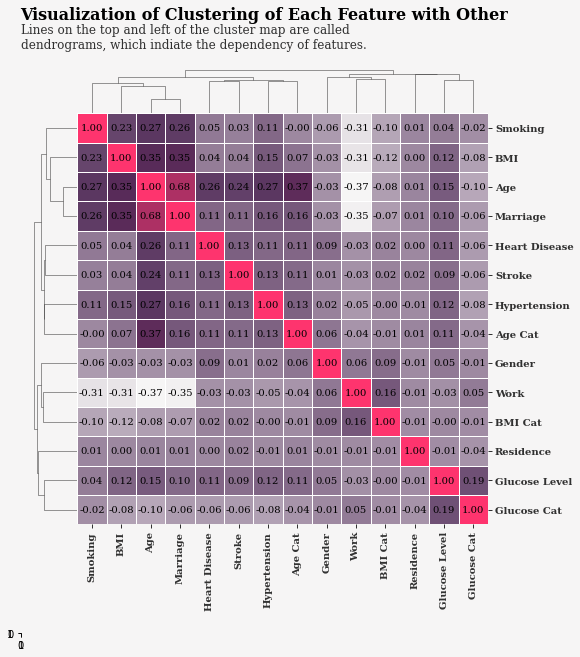

In [29]:
labels = ['Smoking', 'BMI','Age', 'Marriage', 'Heart Disease', 'Stroke','Hypertension', 'Age Cat', 'Gender', 'Work', 'BMI Cat', 'Residence','Glucose Level', 'Glucose Cat' ]


g = sns.clustermap(df_corr, annot = True, fmt = '0.2f',
                   cbar= False, cbar_pos=(0,0, 0,0),linewidth = 0.5,
                   cmap = colormap,dendrogram_ratio=0.1,
                   facecolor = '#f6f5f5', figsize = (8,8),square = True,
                   annot_kws = {'font':'serif', 'size':10, 'color':'black'} )

plt.gcf().set_facecolor('#f6f5f5')
label_args = {'font':'serif', 'font':18, 'weight':'bold'}
plt.setp(g.ax_heatmap.set_yticklabels(labels), rotation=0, fontsize = 10, fontfamily = 'Serif', fontweight = 'bold', alpha = 0.8)  # For y axis
plt.setp(g.ax_heatmap.set_xticklabels(labels), rotation=90, fontsize = 10, fontfamily = 'Serif', fontweight = 'bold', alpha = 0.8) # For x axis
g.fig.text(0,1.065,'Visualization of Clustering of Each Feature with Other',{'font':'serif', 'size':16, 'weight':'bold'})
g.fig.text(0,1.015,'Lines on the top and left of the cluster map are called \ndendrograms, which indiate the dependency of features.',{'font':'serif', 'size':12}, alpha = 0.8)
plt.show()

In [30]:
le = LabelEncoder()
df_par = df.copy()
for col in df.select_dtypes(exclude = ['int64', 'float', 'float64', 'int']).columns:
    df_par[col] = le.fit_transform(df_par[col])


fig = px.parallel_coordinates(df_par.drop(columns = ['id']), color="stroke",
                              color_continuous_scale=px.colors.diverging.Tealrose, title = 'Visualization of Multivariate Data')

fig.show()

In [31]:
# final data preprocessing and preperation

df_copy = df.copy()
# feature log transformations 

df['age'] = df['age'].apply(lambda x: np.log(x+10)*3)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df['bmi'] = df['bmi'].apply(lambda x: np.log(x+10)*2)



# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

X = df.drop(['stroke','id'], axis = 1)
y = df['stroke']

ordinal = ['age_cat',  'glucose_cat', 'bmi_cat','hypertension', 'heart_disease'] # label enconding
nominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level'] 

## label encoding of ordinal categorical features
for col in ordinal:
    X[col] = le.fit_transform(X[col])
    
## normalizing with standard scaler of numerical features
X[numerical] = ss.fit_transform(X[numerical])

## norminal data one hot encoding for categorical features
temp = X.drop(columns = nominal)
dummies = pd.get_dummies(X[nominal])
X = pd.concat([temp,dummies], axis = 1)

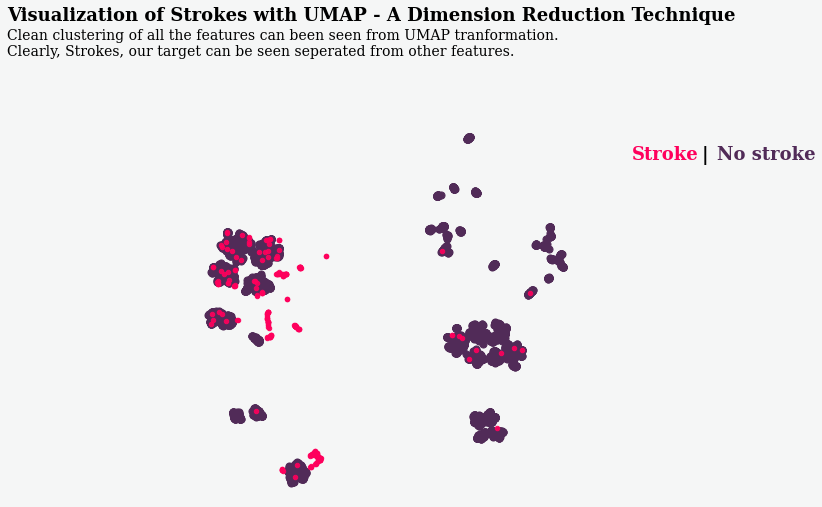

In [32]:
# Umap -  Uniform Manifold Approximation and Projection
umap = UMAP(random_state=2021)
stroke_umap = umap.fit_transform(X, y)



fig = plt.figure(figsize=(7,7))# # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])


# Change background color
background_color = "#f5f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


ax0.scatter(stroke_umap[df['stroke'] == 0][:,0], stroke_umap[df['stroke'] == 0][:,1], c='#512b58', alpha=1,s=50)
ax0.scatter(stroke_umap[df['stroke'] == 1][:,0], stroke_umap[df['stroke'] == 1][:,1], c='#ff005c', alpha=0.9,s=20)


ax0.text(-25, 24, 'Clean clustering of all the features can been seen from UMAP tranformation. \nClearly, Strokes, our target can be seen seperated from other features.',fontsize=14, fontfamily='serif')

ax0.text(-25, 27, 'Visualization of Strokes with UMAP - A Dimension Reduction Technique', 
        fontsize=18, fontweight='bold', fontfamily='serif')


for s in ["top","right","left","bottom"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_xticks([])
ax0.set_yticks([])

fig.text(1,0.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#ff005c')
fig.text(1.14,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(1.17,0.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#512b58')

plt.show()

<a id = '3'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 3. Visualization of Data Balancing with Data Sampling techniques</h2>


<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center">Original Data vs Random Datasampling </h2>


In [33]:
##### visualization class for dimension reduction and plotting result

class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], c = '#512b58', s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], c = '#ff005c', s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#ff005c')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#512b58')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        


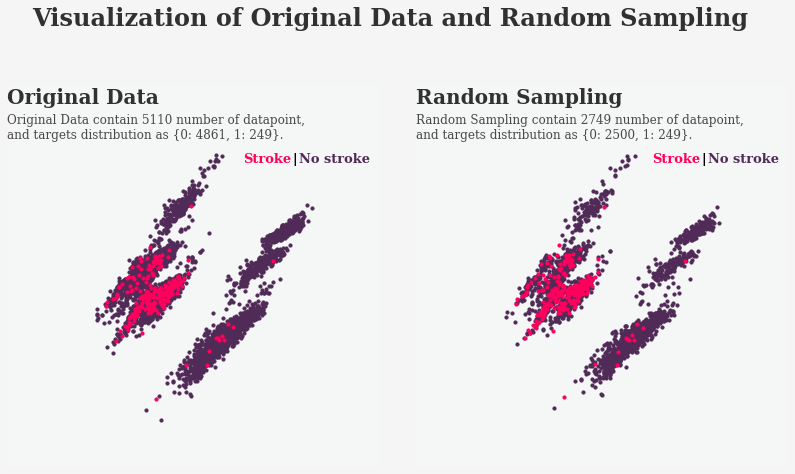

In [34]:
fig = plt.figure(figsize =(14,7))

gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

axes = [ax1, ax2]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')


random_state = 2021

# Original Data
sampling(X,y.ravel(),'Original Data',ax=ax1).visualize_data()


#randomundersampling
X_rs, y_rs = make_imbalance(X, y.ravel(),random_state= 2021, sampling_strategy ={ 0: 2500, 1:249},)
sampling(X_rs,y_rs,'Random Sampling',ax=ax2).visualize_data()
fig.text(0.15,1,'Visualization of Original Data and Random Sampling', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center"> Visualization of UnderSampling Technique</h2>


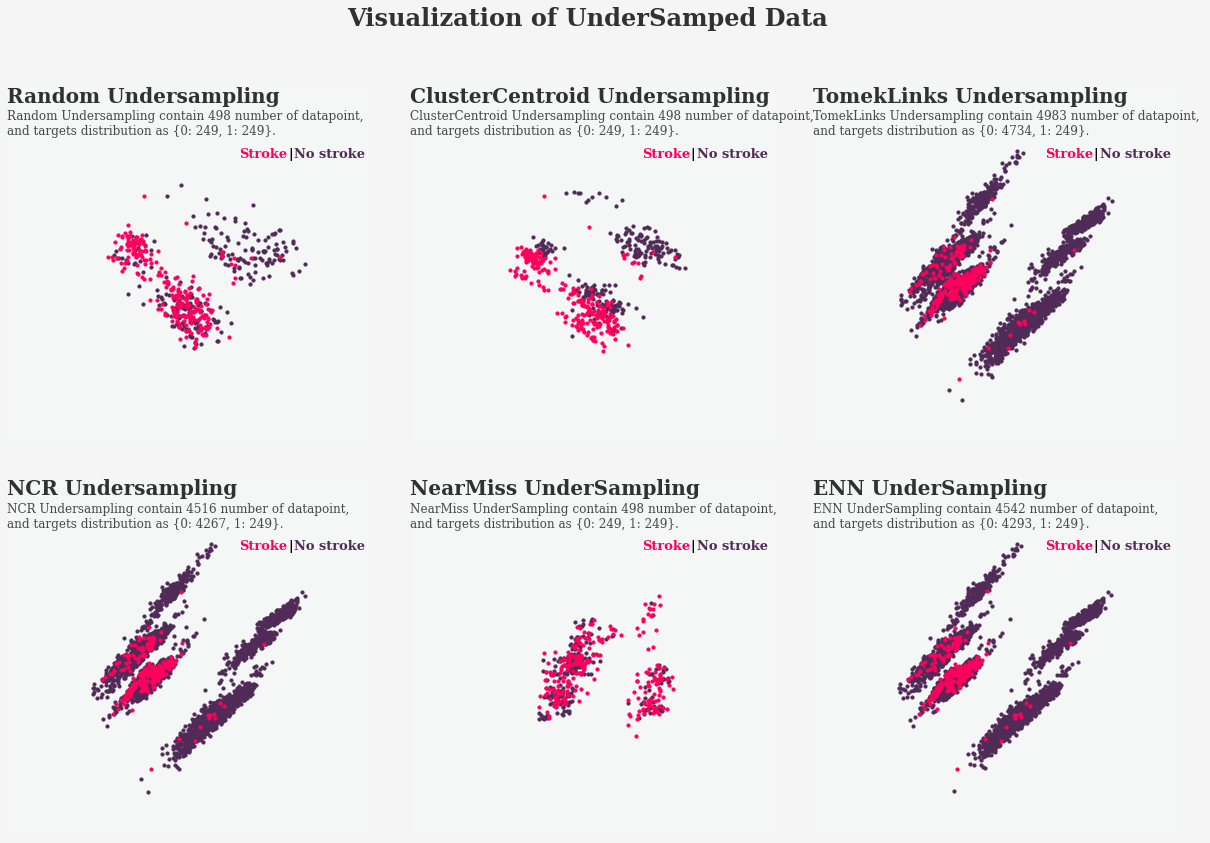

In [35]:
fig = plt.figure(figsize =(21,21))

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])



axes = [ax1, ax2, ax3, ax4, ax5, ax6]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2021

# RandomUnderSampler
sampler = RandomUnderSampler(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'Random Undersampling',ax=ax1).visualize_data()


# ClusterCentroids
sampler = ClusterCentroids(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ClusterCentroid Undersampling',ax=ax2).visualize_data()

# TomekLinks
sampler = TomekLinks()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'TomekLinks Undersampling',ax=ax3).visualize_data()


# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'NCR Undersampling',ax=ax4).visualize_data()


# NearMiss
sampler = NearMiss()
X_rs, y_rs = sampler.fit_resample(X,y.ravel())
sampling(X_rs,y_rs,'NearMiss UnderSampling',ax=ax5).visualize_data()



# EditedNearestNeighbours
sampler = EditedNearestNeighbours()
X_rs, y_rs = sampler.fit_resample(X, y)
sampling(X_rs,y_rs,'ENN UnderSampling',ax=ax6).visualize_data() 

fig.text(0.35,0.92,'Visualization of UnderSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()

<h2 style = "font-family:garamond; font-size:35px; background-color: #f6f5f5; color : #fe346e; border-radius: 100px 100px; text-align:center">Visualization of OverSampling Techinque</h2>


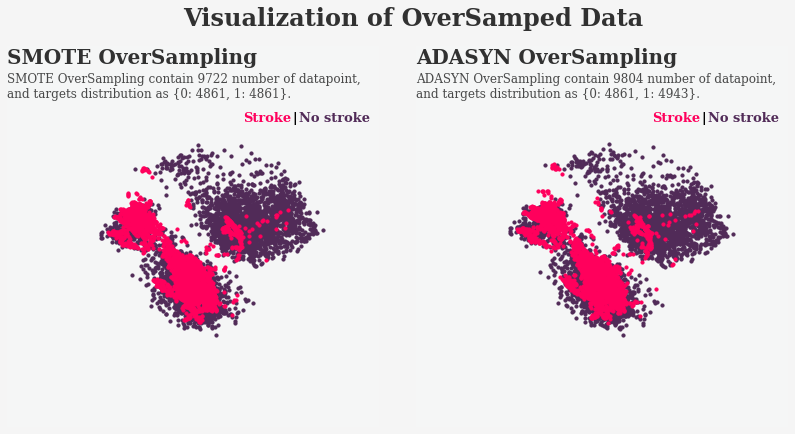

In [36]:
fig = plt.figure(figsize =(14,7))

gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])


axes = [ax1, ax2]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2021


# SMOTESampler
sampler = SMOTE()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'SMOTE OverSampling',ax=ax1).visualize_data() 


# ADASYNSampler
sampler = ADASYN()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ADASYN OverSampling',ax=ax2).visualize_data()

fig.text(0.3,0.92,'Visualization of OverSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()



Choosing SMOTE oversampling data for modeling as the number of datapoints generated are in equal proportion from this technique.

<a id = '4'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 4. Modelling and Results</h2>


In [37]:
# training and testing data split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 2021)

#smoteresampling 
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (7284, 24)
Shape of Training targets: (7284,)
Shape of Testing features: (1278, 24)
Shape of Testing targets: (1278,)


In [38]:
# Null accuracy Score for current data
NUll_acc = round (max(y_test.mean(), 1 - y_test.mean()), 2)

print('Null Accuracy Score for Current Data is {}'.format(NUll_acc))

Null Accuracy Score for Current Data is 0.95


This mean any dump model could randomly predict targets nearly 95% accurate. With implementation of some kind of data sampling should do a better job compared to raw data. 

In [39]:
#### predictions with resampled data


def predictions(x_set,y_set):
    t1 = time.time()
    print('Classification Process Starts....')
    accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[]
        
    random_state = 2021
    
    ##classifiers list 
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(XGBClassifier(random_state = random_state,eval_metric = 'logloss',learning_rate = 0.054))
    classifiers.append(LGBMClassifier(random_state = random_state,learning_rate = 0.067))


    for classifier in classifiers:
        
        t =time.time()
        print('fitting on classifier with parameters: {}'.format(classifier))
        
        #classifier and fitting
        clf = classifier
        clf.fit(x_set,y_set)
        
        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)
        
        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))
        
        elapsed = time.time() - t
        print('Done and elapsed time is {}seconds'.format(round(elapsed,3)))
        print('\n')
    results_df = pd.DataFrame({"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Confusion Matrix":conf_mat,
                        "Algorithm":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost", "LightGBM"]})
    
    results_df = (results_df.sort_values(by = 'Algorithm', ascending = False)
                  .reset_index(drop =  True))
    t2 = time.time() - t1
    print('\nClassification is Completed and results are strored in dataframe.\ntotal time elapsed is {}seconds'.format(t2))
    print('***************************************************************\n\n')
    
    return results_df


In [40]:
orig_results = predictions(X_train,y_train)
resamp_results = predictions(X_resample,y_resample)

Classification Process Starts....
fitting on classifier with parameters: SVC(probability=True, random_state=2021)
Done and elapsed time is 1.201seconds


fitting on classifier with parameters: DecisionTreeClassifier(random_state=2021)
Done and elapsed time is 0.028seconds


fitting on classifier with parameters: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2021))
Done and elapsed time is 0.029seconds


fitting on classifier with parameters: RandomForestClassifier(random_state=2021)
Done and elapsed time is 0.467seconds


fitting on classifier with parameters: GradientBoostingClassifier(random_state=2021)
Done and elapsed time is 0.586seconds


fitting on classifier with parameters: KNeighborsClassifier()
Done and elapsed time is 0.262seconds


fitting on classifier with parameters: LogisticRegression(random_state=2021)
Done and elapsed time is 0.067seconds


fitting on classifier with parameters: XGBClassifier(base_score=None, booster=None, colsample_bylevel=No

In [41]:
def multi_visualize(data, vmin = -0.5, vmax = 1):
    fig = plt.figure(figsize =(24,24))
    gs = fig.add_gridspec(8,6)
    gs.update(wspace = 0.2, hspace = 0.1)
    
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    
    ax4 = fig.add_subplot(gs[1,0])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[1,2])
    
    ax7 = fig.add_subplot(gs[2,0])
    ax8 = fig.add_subplot(gs[2,1])
    ax9 = fig.add_subplot(gs[2,2])
    
    ax10 = fig.add_subplot(gs[0,3])
    ax11 = fig.add_subplot(gs[0,4])
    ax12 = fig.add_subplot(gs[0,5])
    
    ax13 = fig.add_subplot(gs[1,3])
    ax14 = fig.add_subplot(gs[1,4])
    ax15 = fig.add_subplot(gs[1,5])
    
    ax16 = fig.add_subplot(gs[2,3])
    ax17 = fig.add_subplot(gs[2,4])
    ax18 = fig.add_subplot(gs[2,5])
    
    
    axes1 = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
    axes2 = [ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18]
    
    axes = [axes1,axes2]
    
    fig.patch.set_facecolor('#f6f5f5')
    
    # setting of axes; visibility of axes and spines turn off
    for ax_list in axes:
        for ax in ax_list:
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            ax.set_facecolor('#f6f5f5')

    colors = ['#512b58','#fe346e']
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    
    
    for ax_list in axes:
        
        if ax_list == axes1:
            res_df = data[0]
        else:
            res_df = data[1]
        
        
        alg = res_df['Algorithm']
        cf = res_df['Confusion Matrix']
        auc = res_df['AUC Score']
        f1 = res_df['f1 Score']
        forig = data[0]['f1 Score']
        fresam = data[1]['f1 Score']
        
        n = 0
        for ax in ax_list:
            cf_mat = cf[n]
            
            #### annotations
            labels = ['True Neg','False Pos','False Neg','True Pos']
            counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
            percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten()/np.sum(cf_mat)]
            
            #### final annotations
            label = (np.array([f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(labels,counts,percentages)])).reshape(2,2)
            
            #### heatmap
            sns.heatmap(data = cf_mat, vmin = vmin, vmax =vmax, cmap = ['grey'],linewidth=2,linecolor = '#f6f5f5',
               ax = ax, annot = label, fmt ='', cbar = False, annot_kws = {'font':'serif','size':10, 'color':'white','weight':'bold'}, alpha =0.8)
            
            #### subtitle
            if ax_list == axes1:
                ax.text(0,-0,'{}'.format(alg[n]),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            else:
                ax.text(0,-0,'SMOTE {}'.format(alg[n]),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
           
        
            #### Auc and F1 score plotting
            
            if ax_list == axes2:
                if (fresam[n] > forig[n]) & (auc[n] > 75):
                    ax.scatter( 1 , 1 , s = 3500, c = '#fe346e')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
                else:
                    ax.scatter( 1 , 1 , s = 3500, c = 'white')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
               
            else:
                if (forig[n] > 5 ) & (auc[n] > 75):
                    ax.scatter( 1 , 1 , s = 3500, c = '#512b58', alpha = 0.9)
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'white', 'weight':'bold'})
                else:
                    ax.scatter( 1 , 1 , s = 3500, c = 'white')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            
           
            n +=1
        if ax_list == axes1:
            ax1.text(0,-0.55,'Visualization of Results with - Original Data',{'font':'serif','size':24, 'color':'black', 'weight':'bold'},)
        else:
            ax10.text(0,-0.55,'Visualization of Results with - Oversampled Data',{'font':'serif','size':24, 'color':'black', 'weight':'bold'}, alpha = 0.9)
            
            
    fig.show()

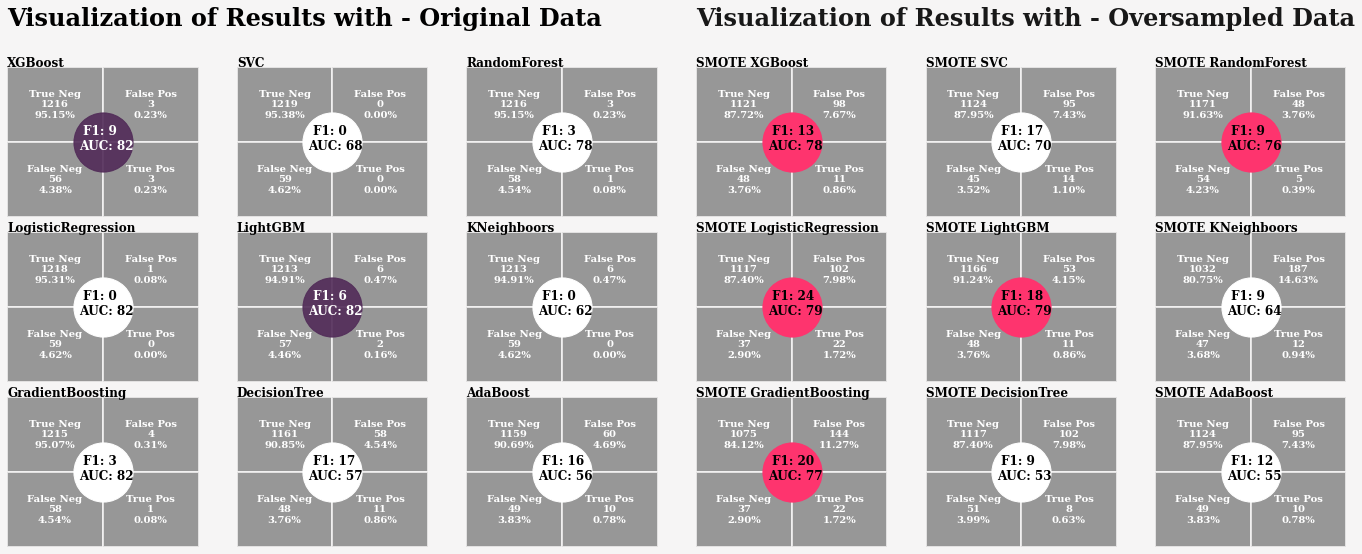

In [42]:
multi_visualize(data = [orig_results, resamp_results], vmin=30,vmax = 100)

From the visulaization it is clear that oversampling data is having better predictions scores than original data.

What can we do furthur?

May be explore gridsearch and stratified fold implementation could be give better results.

# Summary 
1. loaded few modules and initial cleaning of data
2. Visulaization of few relationships bewteen variables and individual variables.
3. feature correaltion visualization
4. balancing of data and visualization
5. implemented few models and visualized the results.


**Thanks for reading!!!**

**Please upvote if you find my work helpful**

<a id = '5'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 5. References</h2>


* [1.About Stroke](https://www.heartandstroke.ca/stroke/what-is-stroke)
* [2.Handling inbalanced data](https://github.com/ChrisKuoColumbiaU/FraudDetection/blob/master/05_Sampling_techniques_for_extremely_imbalanced_data.ipynb)
* [3. TOP 50 visualization techniques](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
* [4.handling imbalanced datasets in machinelearning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)
* [5.Visualization notebook ](https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction)
* [6.Beautify Jupyter notebook](https://www.kaggle.com/shubhamksingh/create-beautiful-notebooks-formatting-tutorial)
* [7.Best Resource for metrics in unbalanced data](https://www.ritchieng.com/machine-learning-evaluate-classification-model/)
* [8.How to make clean visualizations](https://www.kaggle.com/gaetanlopez/how-to-make-clean-visualizations)